In [1]:
import matplotlib.pyplot as plt
import shap
from chessplainer.wrapper import EngineWrapper, ChessExplainer
import chess
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('default')


In [2]:
PLOT_SIZE = (8, 4)
FIT_LIMIT_KWARGS = dict(time=5)
PREDICT_LIMIT_KWARGS = dict(time=0.1)
NSAMPLES = 10000
FOLDER = pathlib.Path("./paper_explanations")

# Perturbations

In [44]:
FILENAME = FOLDER / "example"
FEN = "8/2k5/2q5/8/4R3/4RK2/8/8 w - - 0 1"

True


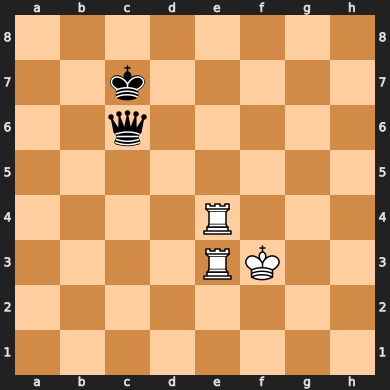

In [8]:
board = chess.Board(FEN)
print(board.turn)
board

In [9]:
%%time
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=FIT_LIMIT_KWARGS,
    predict_limit_kwargs=PREDICT_LIMIT_KWARGS,
)
engine.fit([board])
chesshap = ChessExplainer(
    board,
    engine,
    explainer=shap.KernelExplainer,
)

print(chesshap.engine.base_score_)

chesshap.explain()

[[0.5 0.5]]


  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 65.9 ms, sys: 18.7 ms, total: 84.6 ms
Wall time: 5.81 s


.values =
array([[[ 0.282, -0.282],
        [ 0.279, -0.279],
        [-0.561,  0.561]]])

.base_values =
array([[0.5, 0.5]])

.data =
array([[1., 1., 1.]])

In [12]:
chesshap.engine.base_score_

array([[0.5, 0.5]])

In [14]:
chesshap.engine.predict_boards_

[Board('8/2k5/8/8/8/4RK2/8/8 w - - 0 1'),
 Board('8/2k5/2q5/8/4R3/5K2/8/8 w - - 0 1'),
 Board('8/2k5/8/8/4R3/5K2/8/8 w - - 0 1'),
 Board('8/2k5/2q5/8/8/4RK2/8/8 w - - 0 1'),
 Board('8/2k5/2q5/8/8/5K2/8/8 w - - 0 1'),
 Board('8/2k5/8/8/4R3/4RK2/8/8 w - - 0 1')]

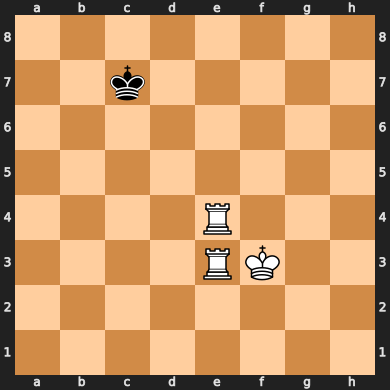

In [42]:
i=5
chesshap.engine.predict_boards_[i]

In [43]:

chesshap.engine.predict_evals_[i]

array([0.997, 0.003])

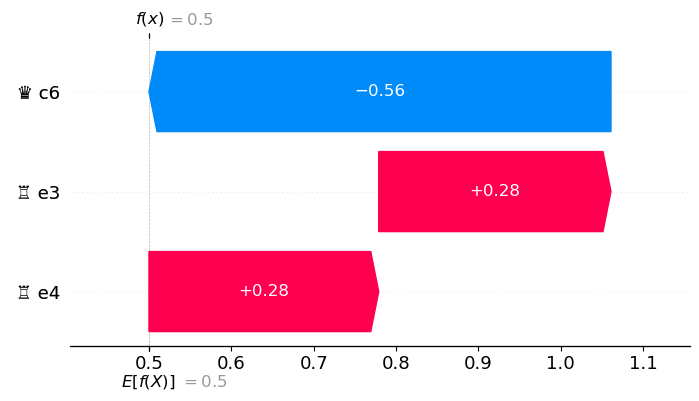

In [45]:
PLOT_SIZE = (8, 4)

chesshap.explanation_.feature_names = chesshap.feature_names
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(*PLOT_SIZE)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)


plt.grid(False)
plt.savefig(str(FILENAME) + ".pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


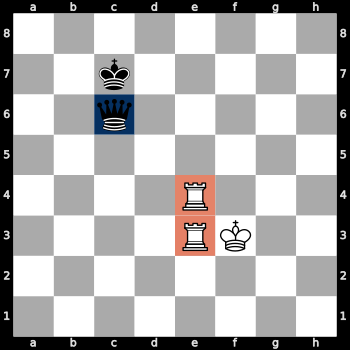

In [46]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [47]:
latex_str = chesshap.to_latex(index=0, local_range=True)
with open(str(FILENAME) + ".txt", "w") as f:
    f.write(latex_str)